In [1]:
import torch

from yolov5.utils.plots import Annotator, colors, save_one_box
from pathlib import Path

from utils.yolo import crop_by_xyxy

import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from dotenv import load_dotenv

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

% matplotlib inline

import numpy as np


In [2]:
model = torch.hub.load(r'..\YOLO', 'custom', path=r'..\YOLO\weights\8-bound.pt', source='local')
data_dir = '..' / Path(os.getenv('DATASET_DIR'))


YOLOv5  torch 1.12.0 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)



requirements: D:\Users\douli\anaconda3\envs\dentist-CV-main\Lib\site-packages\yolov5\requirements.txt not found, check failed.


Fusing layers... 
Model summary: 270 layers, 7041205 parameters, 0 gradients
Adding AutoShape... 


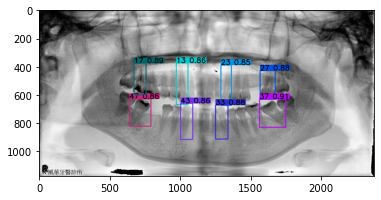

In [5]:
image_names = list(data_dir.glob('*008225.jpg'))

image_name = image_names[0]
filename = image_name.stem

results = model(image_name)
rendered_results = results.render()
detected_results = model(image_name)

plt.imshow(1 - rendered_results[0])
plt.show()


In [4]:
flag_dict = {
    'upper': [
        '17', '13', '23', '27'
    ],
    'lower': [
        '47', '43', '33', '37'
    ]
}

tooth_position_dict = {
    0: 'left',
    1: 'middle',
    2: 'right'
}


In [11]:
images = {}
split_teeth = {}
for i in range(len(detected_results)):
    file_name = detected_results.files[i][:-4]
    bounds = detected_results.xyxy[i]
    img = detected_results.imgs[i]

    images[file_name] = []
    split_teeth[file_name] = {}
    for flag in ('upper', 'lower'):
        teeth_dict = {}
        flag_list = flag_dict[flag]

        for j in range(len(bounds)):
            *xyxy, _, cls = bounds[j]
            xyxy = torch.vstack(xyxy)

            cls = int(cls.item())
            name = int(detected_results.names[cls])
            teeth_dict[name] = xyxy

            crop_image = crop_by_xyxy(img, xyxy.int())
            split_teeth[file_name][name] = {'xyxy': xyxy, 'crop_image': crop_image}


{'00008225': {37: {'xyxy': tensor([[1565.11401],
           [ 630.64832],
           [1751.04907],
           [ 830.95221]], device='cuda:0'),
   'crop_image': array([[[ 53,  53,  53],
           [ 53,  53,  53],
           [ 54,  54,  54],
           ...,
           [211, 211, 211],
           [210, 210, 210],
           [209, 209, 209]],
   
          [[ 52,  52,  52],
           [ 51,  51,  51],
           [ 52,  52,  52],
           ...,
           [211, 211, 211],
           [206, 206, 206],
           [204, 204, 204]],
   
          [[ 52,  52,  52],
           [ 54,  54,  54],
           [ 52,  52,  52],
           ...,
           [205, 205, 205],
           [203, 203, 203],
           [206, 206, 206]],
   
          ...,
   
          [[110, 110, 110],
           [106, 106, 106],
           [103, 103, 103],
           ...,
           [131, 131, 131],
           [128, 128, 128],
           [127, 127, 127]],
   
          [[110, 110, 110],
           [106, 106, 106],
           [